### Total load

The dataset *TERNA_SUNSET_TOTAL_LOAD_QH* deals with the trend of the total demand in the Italian electrical system. The 'forecast' data is produced the day before the reference day based on our best prediction, taking into account all the variables that can influence the demand for electricity: from meteorological and climatic factors to socioeconomic components.

In [1]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_TOTAL_LOAD_QH" 
total_load = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
total_load = total_load.sort_values(by='ORAINI')

total_load

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ZONA,ORAINI,FLOWDATE,FLOWHOUR,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW,LOADTIME
551615,Italy,201901010000,20190101,1,24370.000,25009.000,2024-10-17 12:45:36.933
1173407,SICI,201901010000,20190101,1,1876.794,1926.005,2024-10-17 12:45:36.933
966143,SARD,201901010000,20190101,1,942.891,967.615,2024-10-17 12:45:36.933
344351,CSUD,201901010000,20190101,1,4292.272,4404.819,2024-10-17 12:45:36.933
137087,CNOR,201901010000,20190101,1,2660.928,2730.699,2024-10-17 12:45:36.933
...,...,...,...,...,...,...,...
1380670,SICI,202412012345,20241201,24,1717.432,1734.740,2024-12-02 06:00:21.057
966142,NORD,202412012345,20241201,24,14022.183,14163.496,2024-12-02 06:00:21.057
137086,CALA,202412012345,20241201,24,505.866,510.964,2024-12-02 06:00:21.057
1173406,SARD,202412012345,20241201,24,786.296,794.220,2024-12-02 06:00:21.057


In [2]:
# Filter the DataFrame for the relevant columns and rows
total_load = total_load[['ZONA', 'TOTAL_LOAD_MW', 'FORECAST_TOTAL_LOAD_MW', 'ORAINI']]
# Convert ORAINI to datetime using the correct method
total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')
total_load.set_index('ORAINI', inplace=True)

total_load.head(8)

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_9544\2034356136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')


,ZONA,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,
2019-01-01 00:00:00,Italy,24370.000,25009.000
2019-01-01 00:00:00,SICI,1876.794,1926.005
2019-01-01 00:00:00,SARD,942.891,967.615
2019-01-01 00:00:00,CSUD,4292.272,4404.819
2019-01-01 00:00:00,CNOR,2660.928,2730.699
2019-01-01 00:00:00,SUD,2820.710,2894.671
2019-01-01 00:00:00,NORD,11776.405,12085.191
2019-01-01 00:15:00,SICI,1887.632,1933.805


In [3]:
total_load.tail(8)

,ZONA,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,
2024-12-01 23:45:00,CSUD,4308.126,4351.542
2024-12-01 23:45:00,ITALY,25699.998,25958.998
2024-12-01 23:45:00,CNOR,2141.066,2162.644
2024-12-01 23:45:00,SICI,1717.432,1734.740
2024-12-01 23:45:00,NORD,14022.183,14163.496
2024-12-01 23:45:00,CALA,505.866,510.964
2024-12-01 23:45:00,SARD,786.296,794.220
2024-12-01 23:45:00,SUD,2219.029,2241.392


In [4]:
subset_zonas = ['NORD']
mnord_load = utils.filter_load_by_zona(total_load, subset_zonas)
mnord_load = mnord_load.drop(columns=['ZONA'])
mnord_load

,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11776.405,12085.191
2019-01-01 00:15:00,11723.369,12010.132
2019-01-01 00:30:00,11771.133,11984.692
2019-01-01 00:45:00,11740.606,11935.066
2019-01-01 01:00:00,11559.374,11825.838
...,...,...
2024-12-01 22:45:00,15579.264,15714.055
2024-12-01 23:00:00,15134.387,15177.134
2024-12-01 23:15:00,14728.064,14823.835


In [5]:
subset_zonas = ['CNORD', 'CSUD', 'SUD', 'SICI', 'SARD', 'CALA']
msud_load = utils.filter_load_by_zona(total_load, subset_zonas)

# Group by datetime and sum TOTAL_LOAD_MW and FORECAST_TOTAL_LOAD_MW
msud_load = msud_load.groupby(msud_load.index).agg(
    TOTAL_LOAD_MW=('TOTAL_LOAD_MW', 'sum'),
    FORECAST_TOTAL_LOAD_MW=('FORECAST_TOTAL_LOAD_MW', 'sum')
).reset_index()

msud_load

,ORAINI,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
0,2019-01-01 00:00:00,9932.667,10193.110
1,2019-01-01 00:15:00,9788.694,10028.134
2,2019-01-01 00:30:00,9709.883,9886.046
3,2019-01-01 00:45:00,9610.960,9770.148
4,2019-01-01 01:00:00,9472.551,9690.910
...,...,...,...
207259,2024-12-01 22:45:00,10714.370,10807.072
207260,2024-12-01 23:00:00,10519.997,10549.711
207261,2024-12-01 23:15:00,10088.964,10154.568
207262,2024-12-01 23:30:00,9881.775,9910.119


In [6]:
subset_zonas = ['ITALY', 'Italy']
italy_load = utils.filter_load_by_zona(total_load, subset_zonas)
italy_load = italy_load.drop(columns=['ZONA'])
italy_load

,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,24370.000,25009.000
2019-01-01 00:15:00,24202.000,24794.001
2019-01-01 00:30:00,24142.000,24580.000
2019-01-01 00:45:00,23969.000,24366.001
2019-01-01 01:00:00,23599.001,24143.000
...,...,...
2024-12-01 22:45:00,28663.999,28912.001
2024-12-01 23:00:00,27969.999,28049.000
2024-12-01 23:15:00,27066.000,27242.000


### Italian total load

I will focus exclusively on the Italian case, where the macrozones Nord and Sud are expected to exhibit similar patterns.

In [7]:
print("Macro-scale descriptive stats: ITALY")
print(italy_load["TOTAL_LOAD_MW"].describe(),"\n")

Macro-scale descriptive stats: ITALY
count    207264.000000
mean      35629.877422
std        8351.360653
min       17164.000000
25%       28499.999000
50%       34927.001000
75%       42689.000000
max       59902.001000
Name: TOTAL_LOAD_MW, dtype: float64 



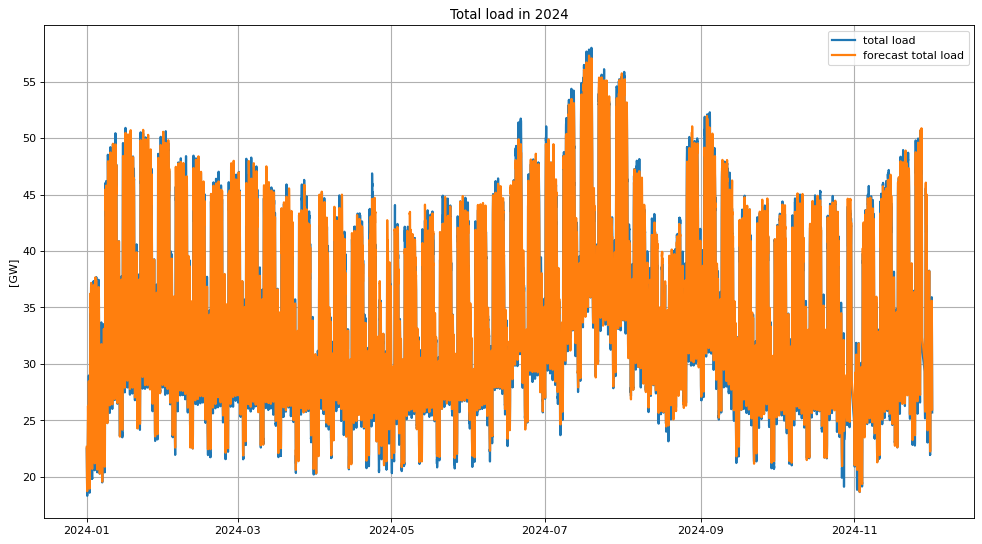

In [8]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "total load")
ax.plot(italy_load["FORECAST_TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "forecast total load")
ax.legend(loc='upper right')
ax.set_title("Total load in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

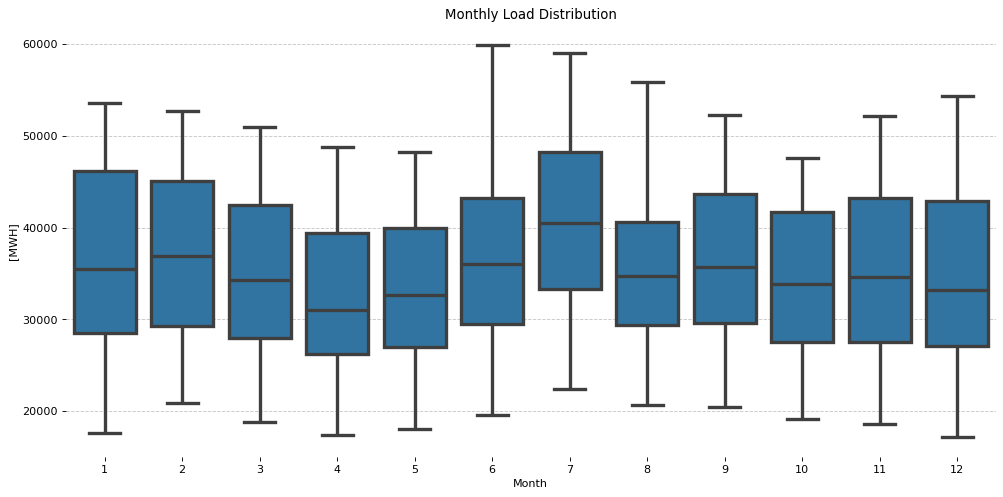

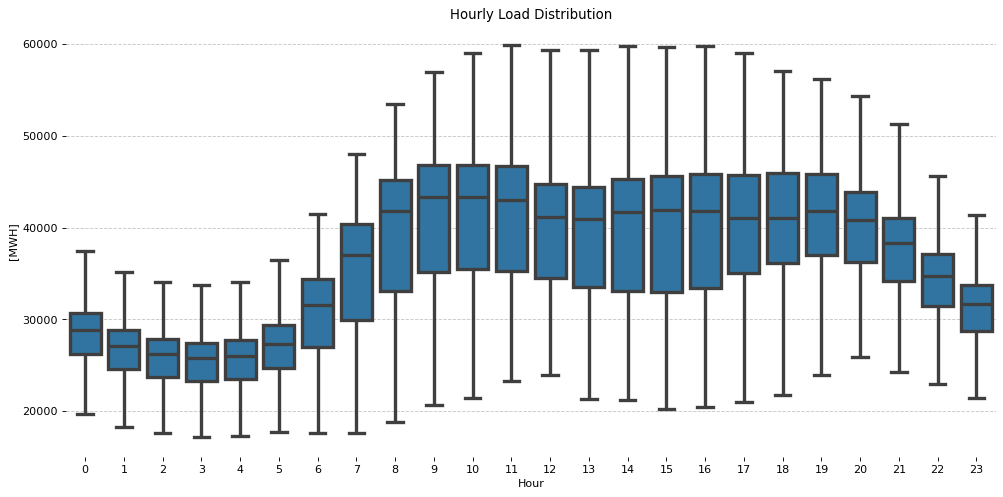

In [9]:
import seaborn as sns

italy_load_copy = italy_load.copy()
italy_load_copy.loc[:, 'hour'] = italy_load_copy.index.hour
italy_load_copy.loc[:, 'month'] = italy_load_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='month', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[MWH]")
ax.set_title("Monthly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='hour', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Hour"); ax.set_ylabel("[MWH]")
ax.set_title("Hourly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Trends in load

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Let's check error metrics for load forecasts:
total_mae = mean_absolute_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])
total_rmse = root_mean_squared_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])

print(f"Total MAE: {total_mae:.2f}MW | Total RMSE: {total_rmse:.2f}MW")

Total MAE: 646.74MW | Total RMSE: 864.35MW


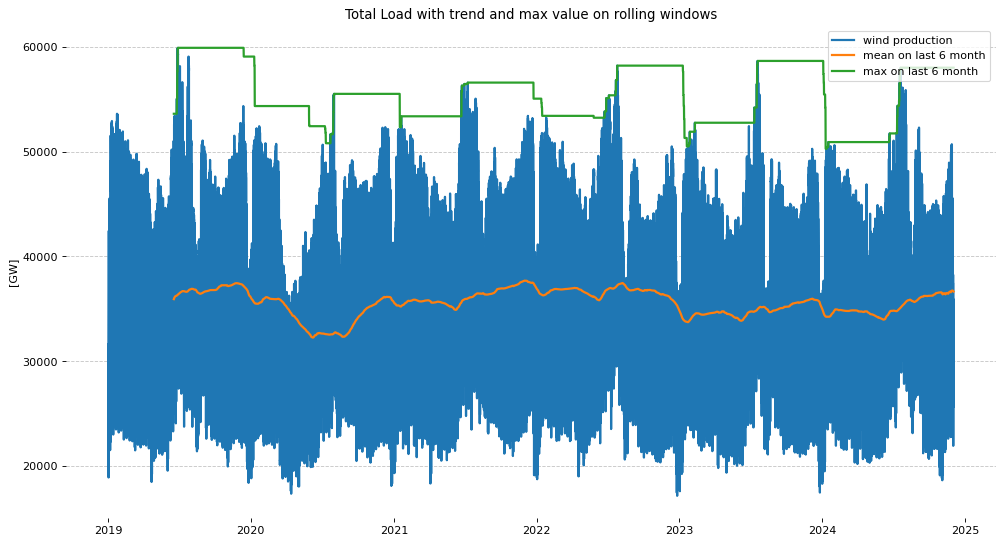

In [11]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"], linewidth=2, label = 'wind production') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Total Load with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

# Entsoe Total Load - Day Ahead / Actual

In [12]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM ENTSOE_DATA" 
entsoe_data = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
entsoe_data = entsoe_data.sort_values(by='ORAINI')

entsoe_data

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,UTC,ORAINI,FLOWDATE,FLOWHOUR,CODZONA,MACROZONA,DOMAIN,SCOPE,ENERGY_TYPE,VALUE,UNIT,BUSINESS_TYPE,LOADTIME
0,2018-12-31T23:00,201901010000,20190101,1,CNOR,SUD,GENERATION,ACTUAL,Biomass,10.0,MW,PRODUCTION,2019-02-20 13:47:34.400
93,2018-12-31T23:00,201901010000,20190101,1,SICI,SUD,GENERATION,ACTUAL,Fossil Coal-derived gas,180.0,MW,PRODUCTION,2019-02-20 13:47:34.400
92,2018-12-31T23:00,201901010000,20190101,1,SICI,SUD,GENERATION,ACTUAL,Biomass,16.0,MW,PRODUCTION,2019-02-20 13:47:34.400
91,2018-12-31T23:00,201901010000,20190101,1,SARD,SUD,LOAD,DAY AHEAD,NA,938.0,MW,CONSUMPTION,2019-02-20 13:47:30.477
90,2018-12-31T23:00,201901010000,20190101,1,SARD,SUD,LOAD,ACTUAL,NA,914.0,MW,CONSUMPTION,2019-02-20 13:47:30.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5439881,2024-12-03T22:00,202412032300,20241203,24,CSUD,SUD,LOAD,DAY AHEAD,NA,5013.0,MW,CONSUMPTION,2024-12-02 06:03:08.917
5439882,2024-12-03T22:00,202412032300,20241203,24,ITALY,ITALY,LOAD,DAY AHEAD,NA,30227.0,MW,CONSUMPTION,2024-12-02 06:03:08.917
5439883,2024-12-03T22:00,202412032300,20241203,24,NORD,NORD,LOAD,DAY AHEAD,NA,17233.0,MW,CONSUMPTION,2024-12-02 06:03:08.917
5439884,2024-12-03T22:00,202412032300,20241203,24,SARD,SUD,LOAD,DAY AHEAD,NA,852.0,MW,CONSUMPTION,2024-12-02 06:03:08.917


In [13]:
entsoe_data = entsoe_data[entsoe_data['DOMAIN'] == 'LOAD']
entsoe_data = entsoe_data.drop(columns=['DOMAIN'])
# Convert ORAINI to datetime using the correct method
entsoe_data['ORAINI'] = pd.to_datetime(entsoe_data['ORAINI'], format='%Y%m%d%H%M')
entsoe_data.set_index('ORAINI', inplace=True)

day_ahead_load = entsoe_data[entsoe_data['SCOPE'] == 'DAY AHEAD']
day_ahead_load = day_ahead_load[['CODZONA', 'VALUE']]
day_ahead_load["FORECAST_TOTAL_LOAD_MW"] = day_ahead_load["VALUE"]
day_ahead_load = day_ahead_load.drop(columns="VALUE")

day_ahead_load

,CODZONA,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,SARD,938.0
2019-01-01 00:00:00,NORD,11110.0
2019-01-01 00:00:00,SUD,2560.0
2019-01-01 00:00:00,SICI,1836.0
2019-01-01 00:00:00,CNOR,2454.0
...,...,...
2024-12-03 23:00:00,CSUD,5013.0
2024-12-03 23:00:00,ITALY,30227.0
2024-12-03 23:00:00,NORD,17233.0


In [14]:
actual_load = entsoe_data[entsoe_data['SCOPE'] == 'ACTUAL']
actual_load = actual_load[['CODZONA', 'VALUE']]
actual_load["TOTAL_LOAD_MW"] = actual_load["VALUE"]
actual_load = actual_load.drop(columns="VALUE")

actual_load

,CODZONA,TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,SARD,914.0
2019-01-01 00:00:00,NORD,11511.0
2019-01-01 00:00:00,SUD,2563.0
2019-01-01 00:00:00,SICI,1884.0
2019-01-01 00:00:00,CNOR,2526.0
...,...,...
2024-12-02 07:00:00,SUD,2429.0
2024-12-02 07:00:00,SICI,1971.0
2024-12-02 07:00:00,CNOR,3138.0


In [15]:
entsoe_load = pd.merge(day_ahead_load, actual_load, on=['ORAINI', 'CODZONA'])

entsoe_load


,CODZONA,FORECAST_TOTAL_LOAD_MW,TOTAL_LOAD_MW
ORAINI,,,
2019-01-01 00:00:00,SARD,938.0,914.0
2019-01-01 00:00:00,NORD,11110.0,11511.0
2019-01-01 00:00:00,SUD,2560.0,2563.0
2019-01-01 00:00:00,SICI,1836.0,1884.0
2019-01-01 00:00:00,CNOR,2454.0,2526.0
...,...,...,...
2024-12-02 07:00:00,SUD,2302.0,2429.0
2024-12-02 07:00:00,SICI,1825.0,1971.0
2024-12-02 07:00:00,CNOR,3145.0,3138.0


In [16]:
subset_zonas = ['NORD']
mnord_load = entsoe_load[entsoe_load['CODZONA'].isin(subset_zonas)]
mnord_load = mnord_load.drop(columns=['CODZONA'])
mnord_load

,FORECAST_TOTAL_LOAD_MW,TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11110.0,11511.0
2019-01-01 01:00:00,10675.0,11039.0
2019-01-01 02:00:00,10080.0,10430.0
2019-01-01 03:00:00,9793.0,9811.0
2019-01-01 04:00:00,9485.0,9474.0
...,...,...
2024-12-02 03:00:00,12088.0,11975.0
2024-12-02 04:00:00,12638.0,12663.0
2024-12-02 05:00:00,14268.0,14316.0


In [17]:
subset_zonas = ['CNORD', 'CSUD', 'SUD', 'SICI', 'SARD', 'CALA']
msud_load = entsoe_load[entsoe_load['CODZONA'].isin(subset_zonas)]
msud_load = msud_load.drop(columns=['CODZONA'])
msud_load

# Group by datetime and sum TOTAL_LOAD_MW and FORECAST_TOTAL_LOAD_MW
msud_load = msud_load.groupby(msud_load.index).agg(
    TOTAL_LOAD_MW=('TOTAL_LOAD_MW', 'sum'),
    FORECAST_TOTAL_LOAD_MW=('FORECAST_TOTAL_LOAD_MW', 'sum')
).reset_index()

msud_load

,ORAINI,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
0,2019-01-01 00:00:00,9607.0,9502.0
1,2019-01-01 01:00:00,9384.0,9110.0
2,2019-01-01 02:00:00,8804.0,8574.0
3,2019-01-01 03:00:00,8188.0,7997.0
4,2019-01-01 04:00:00,7790.0,7798.0
...,...,...,...
42171,2024-12-02 03:00:00,7142.0,7046.0
42172,2024-12-02 04:00:00,7428.0,7165.0
42173,2024-12-02 05:00:00,8081.0,7749.0
42174,2024-12-02 06:00:00,9781.0,9329.0


In [18]:
subset_zonas = ['ITALY', 'Italy']
italy_load = entsoe_load[entsoe_load['CODZONA'].isin(subset_zonas)]
italy_load = italy_load.drop(columns=['CODZONA'])
italy_load

,FORECAST_TOTAL_LOAD_MW,TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,23066.0,23644.0
2019-01-01 01:00:00,22159.0,22850.0
2019-01-01 02:00:00,20935.0,21600.0
2019-01-01 03:00:00,19927.0,20255.0
2019-01-01 04:00:00,19302.0,19459.0
...,...,...
2024-12-02 03:00:00,21362.0,21311.0
2024-12-02 04:00:00,22056.0,22424.0
2024-12-02 05:00:00,24499.0,25013.0


<h2> Italian total load </h2>

In [19]:
print("Macro-scale descriptive stats: ITALY")
print(italy_load["TOTAL_LOAD_MW"].describe(),"\n")

Macro-scale descriptive stats: ITALY
count    42041.000000
mean     32506.148403
std       7432.795216
min        358.000000
25%      26191.000000
50%      32005.000000
75%      38644.000000
max      53950.000000
Name: TOTAL_LOAD_MW, dtype: float64 



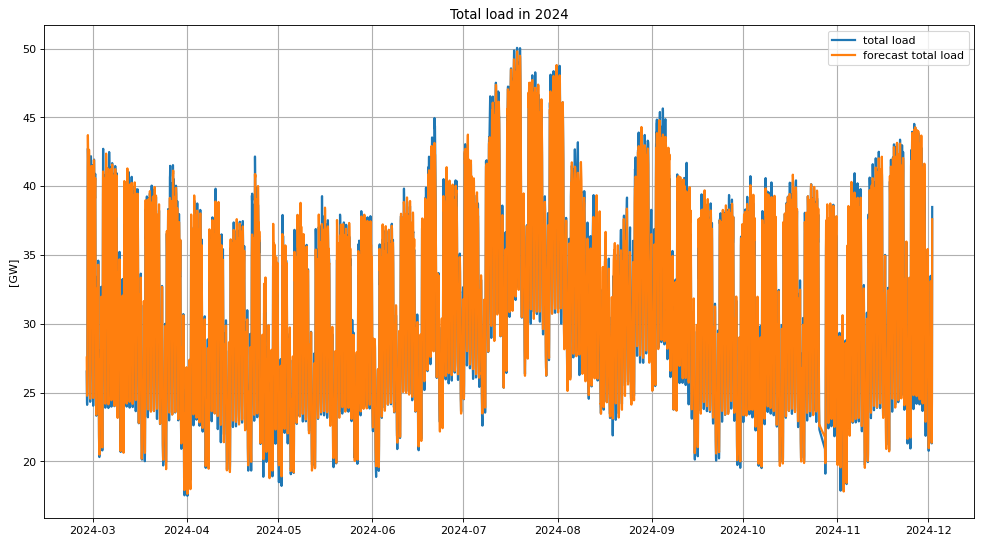

In [20]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "total load")
ax.plot(italy_load["FORECAST_TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "forecast total load")
ax.legend(loc='upper right')
ax.set_title("Total load in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

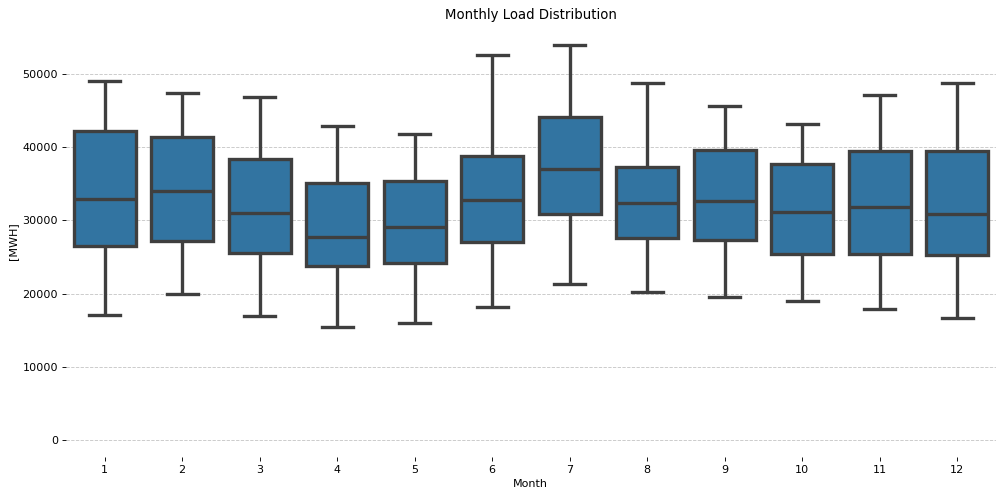

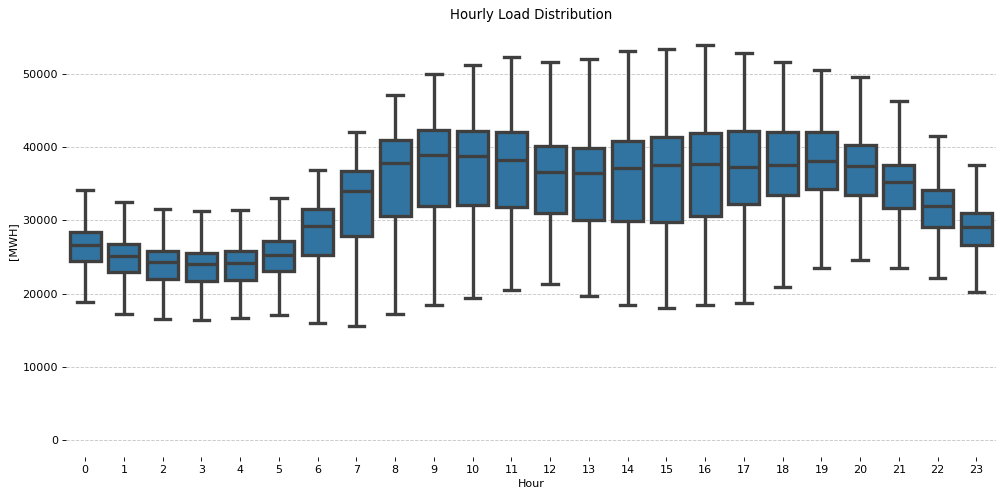

In [21]:
import seaborn as sns

italy_load_copy = italy_load.copy()
italy_load_copy.loc[:, 'hour'] = italy_load_copy.index.hour
italy_load_copy.loc[:, 'month'] = italy_load_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='month', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[MWH]")
ax.set_title("Monthly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='hour', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Hour"); ax.set_ylabel("[MWH]")
ax.set_title("Hourly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Let's check error metrics for load forecasts:
total_mae = mean_absolute_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])
total_rmse = root_mean_squared_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])

print(f"Total MAE: {total_mae:.2f}MW | Total RMSE: {total_rmse:.2f}MW")

Total MAE: 591.95MW | Total RMSE: 808.85MW


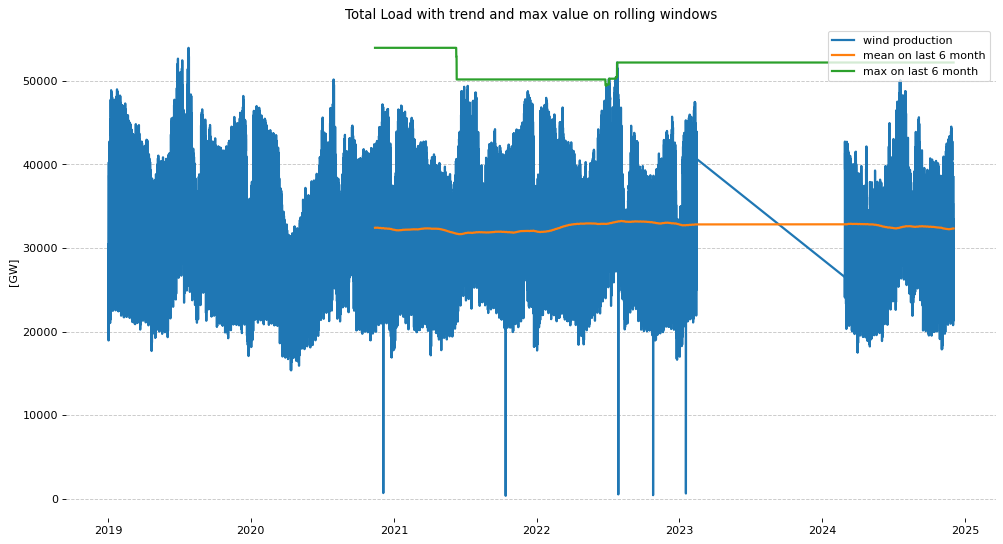

In [23]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"], linewidth=2, label = 'wind production') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Total Load with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()